In [3]:
import os 
os.chdir('/rds/general/user/ma11115/home/LRBMFO')

In [4]:
import torch

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from misc import simple_regret, get_problem_settings, bin_mean_cost, set_matplotlib_params

In [5]:
env = "hartmann"
algo = "mes"
budget = 100
bins = 50

In [74]:
import glob
files = glob.glob("./results/exp_hartmann_fixed_Mfmes_downsampling_noise_01_*.pt")
data_all_mu = []
for f in files:
    print(f)
    data = torch.load(f)
    data_all_mu.extend(data)
li = [torch.clamp(x[0],0).cpu() for x in data]
print(len(data_all_mu))
mu2,sigma2,bins2 = bin_mean_cost(li,budget=budget,nbins=bins,idx_comp=0)

    # mu1+=1e-2
    # mu1 = torch.clamp(mu1,1e-4)


./results/exp_hartmann_fixed_Mfmes_downsampling_noise_01_3af0dd57b3e24363b1e9e5c10c2413b2_results.pt
./results/exp_hartmann_fixed_Mfmes_downsampling_noise_01_162028ce180d4c5cb2a76a9b5ed526b3_results.pt
./results/exp_hartmann_fixed_Mfmes_downsampling_noise_01_19cf6adc6ef34598ae2bdde519652c24_results.pt
15


In [75]:

files = glob.glob("./results/exp_hartmann_fixed_sfmes_downsampling_*.pt")
data_all = []
for f in files:
    print(f)
    data = torch.load(f)
    data_all.extend(data)
li = [torch.clamp(x[0],0).cpu() for x in data]
mu1,sigma1,bins1 = bin_mean_cost(li,budget=budget,nbins=bins,idx_comp=0)


./results/exp_hartmann_fixed_sfmes_downsampling_d21e0a5aaa7d47d084d6f6aaf1cbcd12_results.pt
./results/exp_hartmann_fixed_sfmes_downsampling_bba7c2db9db1423389eb2a33b88af633_results.pt


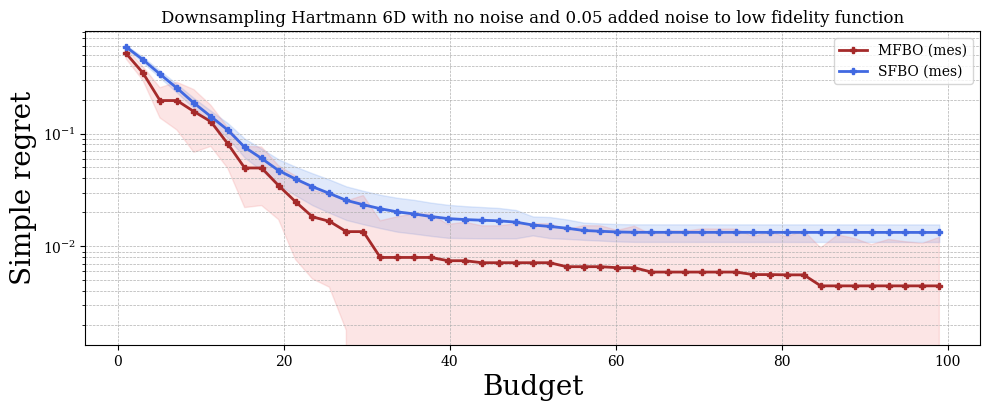

In [76]:
plt.figure(figsize=(10, 4))
plt.rc('font', family='serif')

plt.plot(bins2, mu2, '-P', color='brown', linewidth=2, markersize=4, label=f"MFBO ({algo})")
plt.plot(bins1, mu1, '-P', color='royalblue', linewidth=2, markersize=4, label=f"SFBO ({algo})")

plt.fill_between(bins1, 
                 [float(regret - std) for regret, std in zip(mu1, sigma1)], 
                 [float(regret + std) for regret, std in zip(mu1, sigma1)], 
                 color='cornflowerblue', alpha=0.2)

plt.fill_between(bins2, 
                 [float(regret - std) for regret, std in zip(mu2, sigma2)], 
                 [float(regret + std) for regret, std in zip(mu2, sigma2)], 
                 color='lightcoral', alpha=0.2)

plt.xlabel("Budget", fontsize=20)
plt.ylabel("Simple regret", fontsize=20)
plt.yscale("log")

# plt.title("Simple regret vs. Budget "+env)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.title('Downsampling Hartmann 6D with no noise and 0.05 added noise to low fidelity function')
plt.show()

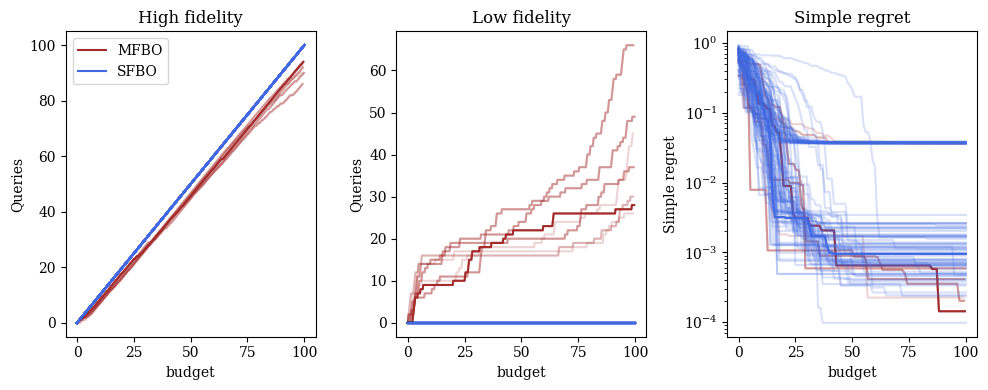

In [87]:
import numpy as np
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
simple_regret_array = np.ones((len(data_all),budget))
fidelities_array = np.ones((len(data_all),budget))
def add_to_plot(ax,data_all,label,color):
    for i, data in enumerate(data_all):

        fidelities_low= np.array([x[2]==0.2 for x in data[0]]).cumsum()
        fidelities_high= np.array([x[2]==1 for x in data[0]]).cumsum()
        budget = fidelities_low*0.2 + fidelities_high
        queries = fidelities_low+fidelities_low
        simple_regret = np.array([x[0] for x in data[0]])
        #simple_regret_array[i,:len(simple_regret)] = simple_regret
        #fidelities_array[i,:len(fidelities)] = fidelities
        if i == 0:
            ax[0].plot(budget,fidelities_high, label=label,color =color)
            ax[1].plot(budget,fidelities_low, label=label,color = color)
            ax[2].plot(budget,simple_regret, label=label,color = color)
        ax[0].plot(budget,fidelities_high, color = color,alpha=0.2)

        ax[1].plot(budget,fidelities_low, color = color,alpha=0.2)
        ax[2].plot(budget,simple_regret,color = color,alpha=0.2)
add_to_plot(ax,data_all_mu,label='MFBO',color='brown')
add_to_plot(ax,data_all,label='SFBO',color='royalblue')
ax[0].set_xlabel('budget')
ax[1].set_xlabel('budget')
ax[0].set_ylabel('Queries')
ax[1].set_ylabel('Queries')
ax[0].set_title('High fidelity')
ax[1].set_title('Low fidelity')
ax[2].set_yscale('log')
ax[2].set_xlabel('budget')
ax[2].set_ylabel('Simple regret')
ax[2].set_title('Simple regret')

fig.tight_layout()

ax[0].legend()


In [55]:
data_all[0]

(tensor([[6.8100e-01, 5.0099e-01, 0.0000e+00],
         [3.8042e-01, 5.0099e-01, 1.0000e+00],
         [3.8042e-01, 3.6650e-01, 2.0000e-01],
         [3.8042e-01, 3.5346e-01, 2.0000e-01],
         [3.8042e-01, 3.1364e-01, 2.0000e-01],
         [3.8042e-01, 2.8424e-01, 2.0000e-01],
         [1.4212e-01, 2.1380e-01, 1.0000e+00],
         [1.4212e-01, 1.2081e-01, 2.0000e-01],
         [1.4212e-01, 1.1696e-01, 2.0000e-01],
         [1.4212e-01, 6.8520e-02, 2.0000e-01],
         [1.4212e-01, 7.5013e-02, 2.0000e-01],
         [8.0714e-02, 6.9340e-02, 1.0000e+00],
         [8.0714e-02, 8.9867e-02, 2.0000e-01],
         [8.0714e-02, 8.9533e-02, 2.0000e-01],
         [6.2318e-02, 5.9076e-02, 1.0000e+00],
         [6.2318e-02, 6.6406e-02, 1.0000e+00],
         [5.6356e-02, 5.4078e-02, 1.0000e+00],
         [5.6356e-02, 5.6955e-02, 1.0000e+00],
         [5.4589e-02, 4.8575e-02, 1.0000e+00],
         [2.7889e-02, 4.2065e-02, 1.0000e+00],
         [1.5961e-02, 2.0188e-02, 1.0000e+00],
         [1.5

In [34]:
fidelities_low

array([  0,   0,   0,   1,   2,   3,   3,   4,   5,   6,   7,   7,   8,
         9,  10,  11,  11,  12,  12,  13,  14,  15,  16,  16,  17,  17,
        18,  18,  18,  19,  19,  20,  20,  20,  20,  20,  21,  21,  21,
        22,  23,  24,  25,  26,  27,  27,  28,  29,  29,  29,  29,  29,
        30,  31,  31,  32,  32,  33,  33,  33,  34,  35,  35,  36,  37,
        37,  38,  39,  40,  41,  41,  42,  43,  44,  44,  45,  46,  46,
        46,  46,  47,  48,  49,  50,  50,  51,  51,  52,  52,  53,  53,
        54,  54,  54,  55,  56,  56,  56,  57,  57,  58,  59,  60,  61,
        61,  61,  62,  62,  63,  63,  64,  64,  64,  64,  64,  64,  64,
        65,  65,  66,  66,  66,  67,  67,  68,  69,  69,  70,  71,  72,
        72,  73,  73,  74,  75,  76,  77,  77,  77,  78,  79,  80,  80,
        81,  81,  82,  82,  83,  83,  83,  83,  83,  84,  84,  85,  85,
        85,  85,  85,  86,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  95,  96,  96,  97,  98,  98,  99, 100, 100, 101, 10